# MOTIVATION:

### To predict the percentage of marks that a student is expected to score based upon the  number of hours they studied using Simple Linear  Variable Regression

## Importing Libraries

In [1]:
import pandas as pd ## used to analyse , manipulate data
import numpy as np ## used to compute high dimensional arrays and manipulate
import matplotlib.pyplot as plt ## used for data visualisation
%matplotlib inline
import seaborn as sns ## used for data visualisation
import warnings
warnings.filterwarnings('ignore') ## to ignore warnings

## Loading dataset from given URL

In [2]:
url='http://bit.ly/w-data'
df=pd.read_csv(url) 
print("Data from the URL loaded succesfully")
df.head() ## Shows the data of first 5 columns in dataset

Data from the URL loaded succesfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [63]:
df.shape

(25, 2)

In [51]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [53]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

Text(0.5, 1.0, 'Hours vs Percentage')

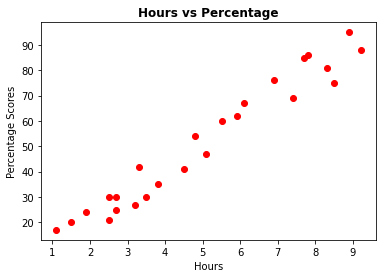

In [3]:
#### Visualizing data through scatter plots
plt.xlabel('Hours')
plt.ylabel ('Percentage Scores')
plt.scatter(df.Hours,df.Scores,color='red')
plt.title('Hours vs Percentage',weight='bold')

###### From the above graph we can observe there is a positive relationship between hours and Percentage scores

In [80]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


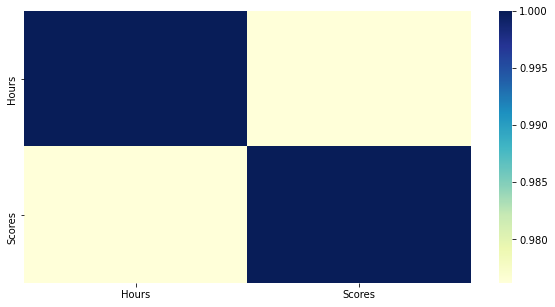

In [86]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap='YlGnBu')

Text(0, 0.5, 'Hours count')

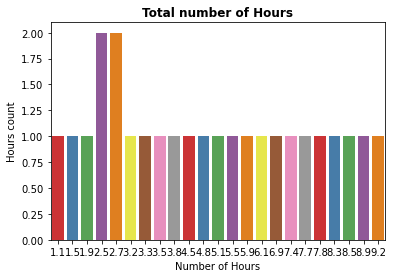

In [84]:
sns.countplot(df['Hours'],data=df,palette='Set1')
plt.title('Total number of Hours',weight='bold')
plt.xlabel('Number of Hours')
plt.ylabel('Hours count')

Text(0, 0.5, 'Total Count')

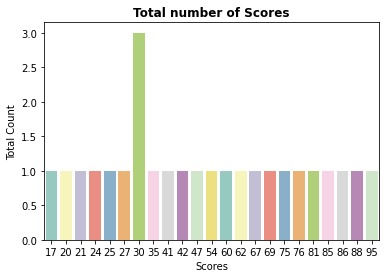

In [87]:
sns.countplot(df['Scores'],data=df,palette='Set3')
plt.title('Total number of Scores',weight='bold')
plt.xlabel('Scores')
plt.ylabel('Total Count')

## Data Preparation

In [54]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

### Splitting data into train and test set using sklearn train_test_split ()

In [37]:
## Importing train_test_spilt from sklearn library
from sklearn.model_selection import train_test_split  


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

In [39]:
print(X_train)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


In [40]:
print(y_train)

[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


#### Now we will train the data by feeding training data to linear regression algorithm

In [41]:
## Importing LinearRegression model from sklearn library
from sklearn.linear_model import LinearRegression 

In [42]:
reg=LinearRegression()
reg.fit(X_train,y_train)
print("Training completed.")

Training completed.


In [43]:
reg.coef_

array([9.91065648])

In [44]:
reg.intercept_

2.0181600414346974

In [56]:
# Plotting the regression line
l = reg.coef_*X+reg.intercept_


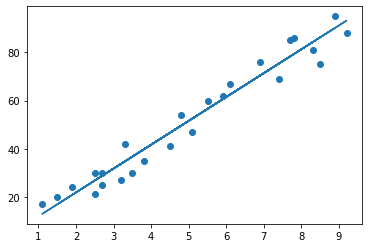

In [57]:
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, l);
plt.show()

### Making Predictions

In [65]:
y_predict=reg.predict(X_test)

In [93]:
y_predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [91]:
reg.predict([[9.25]])

array([93.69173249])

### Evaluating model 

In [75]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
